### This project works with data from the web. My goal is to scrape it or request it, wrangle it, produce some plotting, in order to demonstrate that you are able to use the functions, plotting, and markdown format we have been learning. 

#### In this project, we are going to scrape the IMDb website for the Top 50 Comedy TV Shows.

## Scrape it

In [99]:
options(warn = -1)

In [100]:
library(tidyverse)

In [101]:
library(magrittr) # better handling of pipes
library(stringr) # to hand strings
library(rvest)  # rvest makes scraping easier

In [102]:
# this is the base url from where the scraping starts

url_titles <- "https://www.imdb.com/search/title/?genres=comedy&title_type=tv_series,mini_series&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=cf842c82-4b86-466c-a1e5-5b763003f175&pf_rd_r=JH8W27GW1V0GND4FMSDE&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=tvmeter"
page_title <- read_html(url_titles)  # reads and parses the webpage into R

##### Set the base url from where the scraping stars and use read_html() reads and parses the webpage into R.

In [103]:
# sees the information in the page.

page_title %>% typeof()
page_title %>% glimpse()

[1] "list"

List of 2
 $ node:<externalptr> 
 $ doc :<externalptr> 
 - attr(*, "class")= chr [1:2] "xml_document" "xml_node"


##### It is a list.

In [104]:
# check the type of page_title

page_title

{html_document}
<html xmlns:og="http://ogp.me/ns#" xmlns:fb="http://www.facebook.com/2008/fbml">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body id="styleguide-v2" class="fixed">\n            <img height="1" widt ...

#####  It's a document. And in particular an XML document. That's sort of html.

In [1]:
# sees the structure of the html and find what we need inside there.

#page_title %>% html_structure()

In [106]:
# scrape the names of TV shows in the html and use html_text() to clean them up

tv_shows_name <- page_title %>%
                    html_nodes(".lister-item-header a") %>%
                    html_text() # clean it up

tv_shows_name %>%
    length()

tv_shows_name %>% 
    head()

[1] 50

[1] "The Boys"                "The Ranch"              
[3] "The Righteous Gemstones" "Shameless"              
[5] "Friends"                 "Suits"

##### Now we have 50 TV Shows's names.

In [107]:
# extract the links

page_title %>%
    html_nodes(".lister-item-header a") %>%
    html_attrs() 

[[1]]
                              href 
"/title/tt1190634/?ref_=adv_li_tt" 

[[2]]
                              href 
"/title/tt4998212/?ref_=adv_li_tt" 

[[3]]
                              href 
"/title/tt8634332/?ref_=adv_li_tt" 

[[4]]
                              href 
"/title/tt1586680/?ref_=adv_li_tt" 

[[5]]
                              href 
"/title/tt0108778/?ref_=adv_li_tt" 

[[6]]
                              href 
"/title/tt1632701/?ref_=adv_li_tt" 

[[7]]
                              href 
"/title/tt0386676/?ref_=adv_li_tt" 

[[8]]
                              href 
"/title/tt4955642/?ref_=adv_li_tt" 

[[9]]
                              href 
"/title/tt0898266/?ref_=adv_li_tt" 

[[10]]
                              href 
"/title/tt3526078/?ref_=adv_li_tt" 

[[11]]
                              href 
"/title/tt2467372/?ref_=adv_li_tt" 

[[12]]
                              href 
"/title/tt2372162/?ref_=adv_li_tt" 

[[13]]
                              href 
"/title/tt0063878/?ref_=adv_li_tt" 

[[14]]
                              href 
"/title/tt9054904/?ref_=adv_li_tt" 

[[15]]
                              href 
"/title/tt0472954/?ref_=adv_li_tt" 

[[16]]
                              href 
"/title/tt6143796/?ref_=adv_li_tt" 

[[17]]
                              href 
"/title/tt5363918/?ref_=adv_li_tt" 

[[18]]
                              href 
"/title/tt1327801/?ref_=adv_li_tt" 

[[19]]
                              href 
"/title/tt2891574/?ref_=adv_li_tt" 

[[20]]
                              href 
"/title/tt0460649/?ref_=adv_li_tt" 

[[21]]
                              href 
"/title/tt1442437/?ref_=adv_li_tt" 

[[22]]
                              href 
"/title/tt1266020/?ref_=adv_li_tt" 

[[23]]
                              href 
"/title/tt2861424/?ref_=adv_li_tt" 

[[24]]
                              href 
"/title/tt5687612/?ref_=adv_li_tt" 

[[25]]
                              href 
"/title/tt9544034/?ref_=adv_li_tt" 

[[26]]
                              href 
"/title/tt5770786/?ref_=adv_li_tt" 

[[27]]
                              href 
"/title/tt3566726/?ref_=adv_li_tt" 

[[28]]
                              href 
"/title/tt5555260/?ref_=adv_li_tt" 

[[29]]
                              href 
"/title/tt0098904/?ref_=adv_li_tt" 

[[30]]
                              href 
"/title/tt6398232/?ref_=adv_li_tt" 

[[31]]
                              href 
"/title/tt5348176/?ref_=adv_li_tt" 

[[32]]
                              href 
"/title/tt7587362/?ref_=adv_li_tt" 

[[33]]
                              href 
"/title/tt0121955/?ref_=adv_li_tt" 

[[34]]
                              href 
"/title/tt0238784/?ref_=adv_li_tt" 

[[35]]
                              href 
"/title/tt0460627/?ref_=adv_li_tt" 

[[36]]
                              href 
"/title/tt0165598/?ref_=adv_li_tt" 

[[37]]
                              href 
"/title/tt0369179/?ref_=adv_li_tt" 

[[38]]
                              href 
"/title/tt1869454/?ref_=adv_li_tt" 

[[39]]
                              href 
"/title/tt8179162/?ref_=adv_li_tt" 

[[40]]
                              href 
"/title/tt0096697/?ref_=adv_li_tt" 

[[41]]
                              href 
"/title/tt0182576/?ref_=adv_li_tt" 

[[42]]
                              href 
"/title/tt5788792/?ref_=adv_li_tt" 

[[43]]
                              href 
"/title/tt1486217/?ref_=adv_li_tt" 

[[44]]
                              href 
"/title/tt1312171/?ref_=adv_li_tt" 

[[45]]
                              href 
"/title/tt6524350/?ref_=adv_li_tt" 

[[46]]
                              href 
"/title/tt1826940/?ref_=adv_li_tt" 

[[47]]
                              href 
"/title/tt4647692/?ref_=adv_li_tt" 

[[48]]
                              href 
"/title/tt1439629/?ref_=adv_li_tt" 

[[49]]
                              href 
"/title/tt7767422/?ref_=adv_li_tt" 

[[50]]
                              href 
"/title/tt3398228/?ref_=adv_li_tt"

In [108]:
# check the class name of title

page_title %>%
    html_nodes(".lister-item-header a") %>%
    html_attrs() %>%
    glimpse() 

List of 50
 $ : Named chr "/title/tt1190634/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt4998212/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt8634332/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt1586680/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt0108778/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt1632701/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt0386676/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt4955642/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt0898266/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt3526078/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt2467372/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt2372162/?ref_=adv_li_tt"
  ..

In [109]:
# get the exact title link. we can add the link to a certain link and get a new url.

link <- page_title %>%
    html_nodes(".lister-item-header a") %>%
    html_attrs() %>%
    map_chr("href")

link %>% 
    head()

[1] "/title/tt1190634/?ref_=adv_li_tt" "/title/tt4998212/?ref_=adv_li_tt"
[3] "/title/tt8634332/?ref_=adv_li_tt" "/title/tt1586680/?ref_=adv_li_tt"
[5] "/title/tt0108778/?ref_=adv_li_tt" "/title/tt1632701/?ref_=adv_li_tt"

##### Now we successfully extracted all the links.

In [110]:
# scrape the rank data from the html

rank <- page_title %>%
  html_nodes(".text-primary") %>%
  html_text()

rank %>%
    length()

rank %>% 
    head()

[1] 50

[1] "1." "2." "3." "4." "5." "6."

##### The data types of rank are strings, we will change the types from strings to numerical later

In [111]:
# scrape the rating data from the html

rating <- page_title %>%
  html_nodes(".ratings-imdb-rating strong") %>%
  html_text()

rating %>%
    length()

rating %>% 
    head()

[1] 50

[1] "8.8" "7.6" "8.1" "8.6" "8.9" "8.5"

##### The data types of rating are strings, we will change the types from strings to numerical later.

In [112]:
# scrape the runtime data from the html

tv_shows_time <- page_title %>%
                   html_nodes(".runtime") %>%
                   html_text()

tv_shows_time %>%
    length()

tv_shows_time %>% 
    head()

[1] 45

[1] "60 min" "30 min" "46 min" "22 min" "44 min" "22 min"

##### The data types of tv_shows_time are strings, we will change the types from strings to numerical later and delete the 'min'. What's more, the number of length of tv_shows_time should be 50, there maybe some missing values in tv_shows_time.

In [113]:
# scrape the genre data from the html

genre <- page_title %>%
            html_nodes(".genre") %>%
            html_text()

genre %>%
    length()

genre %>% 
    head()

[1] 50

[1] "\nAction, Comedy, Crime            " "\nComedy, Drama            "        
[3] "\nComedy            "                "\nComedy, Drama            "        
[5] "\nComedy, Romance            "       "\nComedy, Drama            "

##### '\n' and space will be removed later.

In [114]:
# scrape the votes data from the html

votes <- page_title %>%
         html_nodes(".sort-num_votes-visible span:nth-child(2)") %>%
         html_text()

votes %>%
    length()

votes %>% 
    head()

[1] 50

[1] "88,781"  "28,052"  "3,599"   "174,672" "703,203" "335,515"

##### The data types of votes are strings, we will change the types from stings to numerical later.

### Wrangle it

In [115]:
# Converting the rating data to numerical

rating <- rating %>%
              as.numeric()

rating %>% 
    head()

[1] 8.8 7.6 8.1 8.6 8.9 8.5

In [116]:
# Converting the rank data to numerical

rank <- rank %>%
            as.numeric()

rank %>% 
    head()

[1] 1 2 3 4 5 6

In [117]:
# Removing min and converting it to numerical

tv_shows_time <- gsub("min","", tv_shows_time)
tv_shows_time <- as.numeric(tv_shows_time)

tv_shows_time %>% 
    head()

[1] 60 30 46 22 44 22

In [118]:
# map the NA in the missing values in tv_shows_time
# missing values are in TV Shows 3, 14, 25, 30, 39.

for (i in c(3,14,25,30,39)){
a <- tv_shows_time[1:(i-1)]
b <- tv_shows_time[i:length(tv_shows_time)]
tv_shows_time <- append(a, list("NA"))
tv_shows_time <- append(tv_shows_time, b)
}

# converting tv_shows_time data to numerical

tv_shows_time <- as.numeric(tv_shows_time)

tv_shows_time

## Reference: https://www.analyticsvidhya.com/blog/2017/03/beginners-guide-on-web-scraping-in-r-using-rvest-with-hands-on-knowledge/

[1] 60 30 NA 46 22 44 22 22 22 22 22 59 30 NA 22 30 30 44 30 22 22 22 23 27 NA
[26] 35 60 45 22 NA 30 60 22 44 40 22 22 60 NA 22 22 57 22 60 30 22 30 22 45 25

In [119]:
# removing \n in genre data

genre <- gsub("\n","",genre)

# removing excess spaces in genre data
genre <- gsub(" ","",genre)

# Convering each genre from string to factor

genre <- genre %>% 
            as.factor()

genre %>% 
        head()

[1] Action,Comedy,Crime Comedy,Drama        Comedy             
[4] Comedy,Drama        Comedy,Romance      Comedy,Drama       
19 Levels: Action,Adventure,Comedy Action,Comedy,Crime ... Comedy,Romance

In [120]:
# removing commas in votes data

votes <- gsub(",","",votes)

# converting votes to numerical

votes <- votes %>%
            as.numeric()

votes %>% 
    head()

[1]  88781  28052   3599 174672 703203 335515

In [121]:
# create the TV Shows dataframe for the data we scrape from the html

tv_shows_df <- data_frame(Rank = rank, TV_Shows = tv_shows_name, Genre = genre, Runtime_mins = tv_shows_time, Rating = rating, Votes = votes)

tv_shows_df %>% 
        head()

Rank,TV_Shows,Genre,Runtime_mins,Rating,Votes
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
1,The Boys,"Action,Comedy,Crime",60,8.8,88781
2,The Ranch,"Comedy,Drama",30,7.6,28052
3,The Righteous Gemstones,Comedy,NA,8.1,3599
4,Shameless,"Comedy,Drama",46,8.6,174672
5,Friends,"Comedy,Romance",22,8.9,703203
6,Suits,"Comedy,Drama",44,8.5,335515


In [122]:
# map the links to the dataframe

tv_shows_df %<>% # the %<>% is from magrittr, it corresponds to tv_shows_df <- tv_shows_df %>% ...
  mutate(Link = link)

tv_shows_df %>% 
    head()

Rank,TV_Shows,Genre,Runtime_mins,Rating,Votes,Link
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>
1,The Boys,"Action,Comedy,Crime",60,8.8,88781,/title/tt1190634/?ref_=adv_li_tt
2,The Ranch,"Comedy,Drama",30,7.6,28052,/title/tt4998212/?ref_=adv_li_tt
3,The Righteous Gemstones,Comedy,NA,8.1,3599,/title/tt8634332/?ref_=adv_li_tt
4,Shameless,"Comedy,Drama",46,8.6,174672,/title/tt1586680/?ref_=adv_li_tt
5,Friends,"Comedy,Romance",22,8.9,703203,/title/tt0108778/?ref_=adv_li_tt
6,Suits,"Comedy,Drama",44,8.5,335515,/title/tt1632701/?ref_=adv_li_tt


##### Now, we have a dataframe which contains all the data we scraped from the website above.

### Automate it

In [123]:
library(purrr) # to work with lists and map functions
library(glue) # to paste strings

In [124]:
# glue the url

url_tv_shows <- glue("https://www.imdb.com{tv_shows_df$Link[1]}")

url_tv_shows

https://www.imdb.com/title/tt1190634/?ref_=adv_li_tt

In [125]:
# scrape the description in the url

url_tv_shows %>%
  read_html() %>%
  html_nodes(".summary_text") %>%
  html_text()

[1] "\n                    A group of vigilantes set out to take down corrupt superheroes who abuse their superpowers.\n            "

In [126]:
# scarpe all the descriptions at one time

get_description <- function(link){
  
  description_chunks <- glue("https://www.imdb.com{link}#") %>%
   read_html() %>%
   html_nodes(".summary_text")
  
  # we do a sanity check to see that there's something inside the lyrics!
  stopifnot(length(description_chunks) > 0)
  
  description <- description_chunks %>%
   html_text() %>%
   glue_collapse(sep =  "\n") # remove "\n"
  
  return(description)
}

In [127]:
# test the function and get perfect description

tv_shows_df$Link[1] %>%
  get_description() %>%
  print()


                    A group of vigilantes set out to take down corrupt superheroes who abuse their superpowers.
            


##### The function works well.

In [128]:
# use a possibly "wrapper" (frompurrr) 

get_description_safe <- purrr::possibly(.f = get_description, # the function that we want to make safer
                                   otherwise = NA_character_) # the value we get back if .f fails

##### To use a possibly "wrapper" (frompurrr) so not to have to stop everything in case something bad happens.

In [129]:
#  map the function over our dataframe

df_tv_shows_summary <- tv_shows_df %>%
                          mutate(Description = map_chr(Link, get_description_safe))

df_tv_shows_summary %>% 
    head()

Rank,TV_Shows,Genre,Runtime_mins,Rating,Votes,Link,Description
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,The Boys,"Action,Comedy,Crime",60,8.8,88781,/title/tt1190634/?ref_=adv_li_tt,A group of vigilantes set out to take down corrupt superheroes who abuse their superpowers.
2,The Ranch,"Comedy,Drama",30,7.6,28052,/title/tt4998212/?ref_=adv_li_tt,The son of a Colorado rancher returns home from a semi-pro football career to run the family business.
3,The Righteous Gemstones,Comedy,NA,8.1,3599,/title/tt8634332/?ref_=adv_li_tt,"Follows a world-famous televangelist family with a long tradition of deviance, greed, and charitable work."
4,Shameless,"Comedy,Drama",46,8.6,174672,/title/tt1586680/?ref_=adv_li_tt,"A scrappy, fiercely loyal Chicago family makes no apologies."
5,Friends,"Comedy,Romance",22,8.9,703203,/title/tt0108778/?ref_=adv_li_tt,Follows the personal and professional lives of six twenty to thirty-something-year-old friends living in Manhattan.
6,Suits,"Comedy,Drama",44,8.5,335515,/title/tt1632701/?ref_=adv_li_tt,"On the run from a drug deal gone bad, Mike Ross, a brilliant college dropout, finds himself a job working with Harvey Specter, one of New York City's best lawyers."


##### Now, we have a complete dataframe from the 'Top 50 Comedy TV Shows' website.

### Plot it

In [130]:
library(scales)

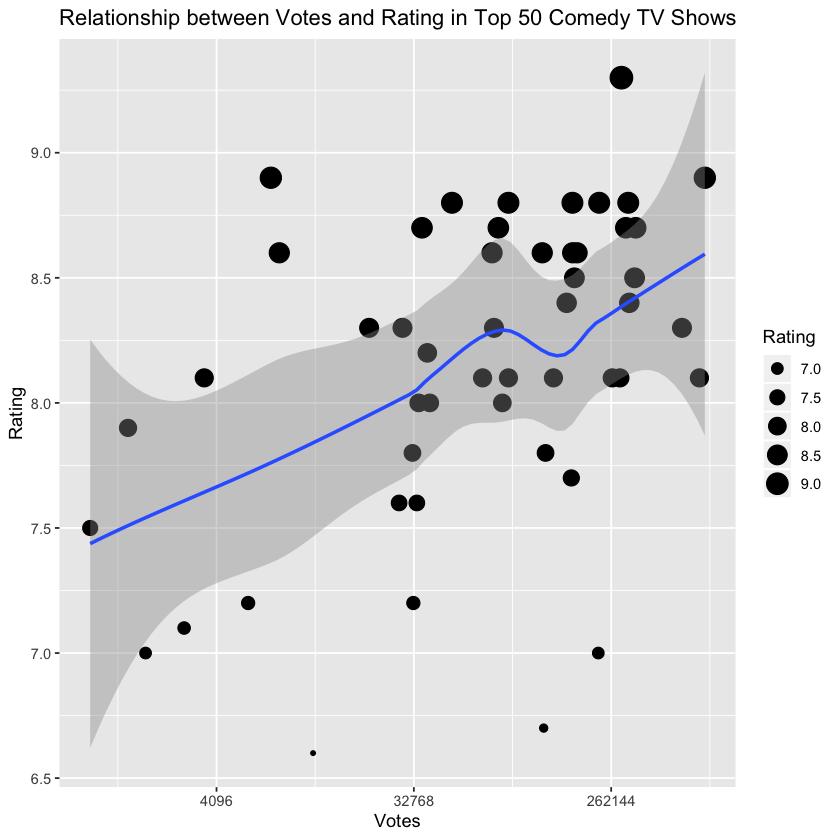

In [134]:
# Relationship between Votes and Rating
# we can see from the picture, with the votes increase the rating of the comedy TV show would increase.

ggplot(df_tv_shows_summary, aes(x = Votes,y = Rating))+
geom_point(aes(size = Rating)) + ggtitle("Relationship between Votes and Rating in Top 50 Comedy TV Shows") + scale_x_continuous(trans = log2_trans()) + geom_smooth(method = "loess")

##### As we can see from the picture, with the votes increase the rating of the comedy TV show would increase. This shows that viewers are more willing to watch some high-rated TV shows, and high-rated TV shows can also attract viewers to watch.

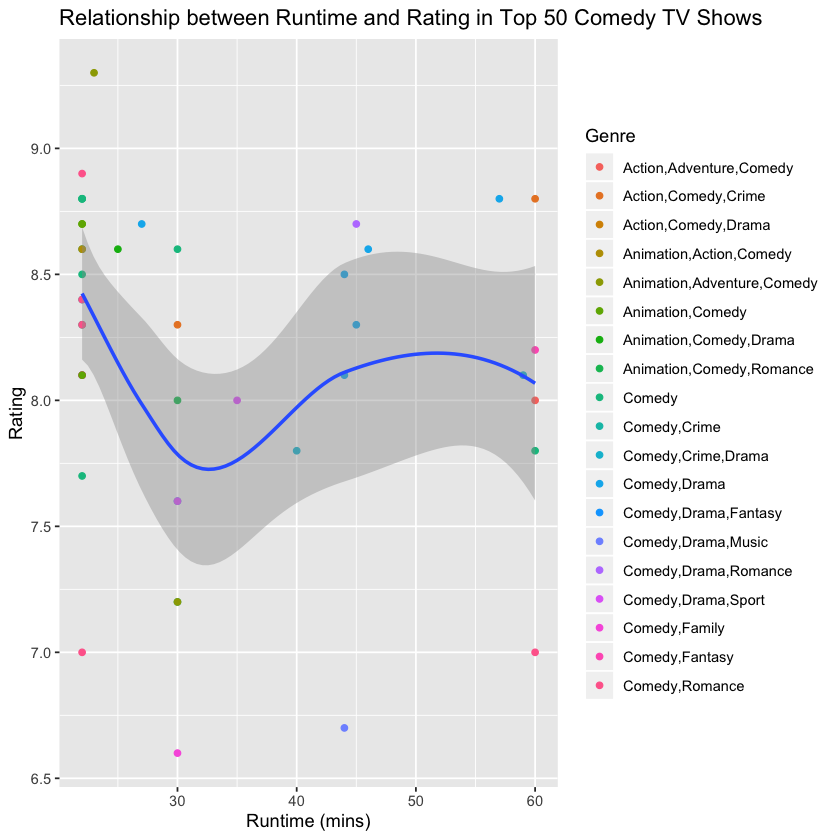

In [135]:
# Relationship between Runtime and Rating
# there are no evidence to present the relationship between rating and runtime 

ggplot(df_tv_shows_summary,aes(x = Runtime_mins,y = Rating))+
geom_point(aes(col = Genre)) + xlab('Runtime (mins)') + ggtitle("Relationship between Runtime and Rating in Top 50 Comedy TV Shows") + geom_smooth(method = "loess")

##### There are no evidence can prove that the rating and runtime have relationship. Follow the picutre, we can see that most Animation and Comedy TV shows' run time less than 30mins and their rating is at least 7.5.

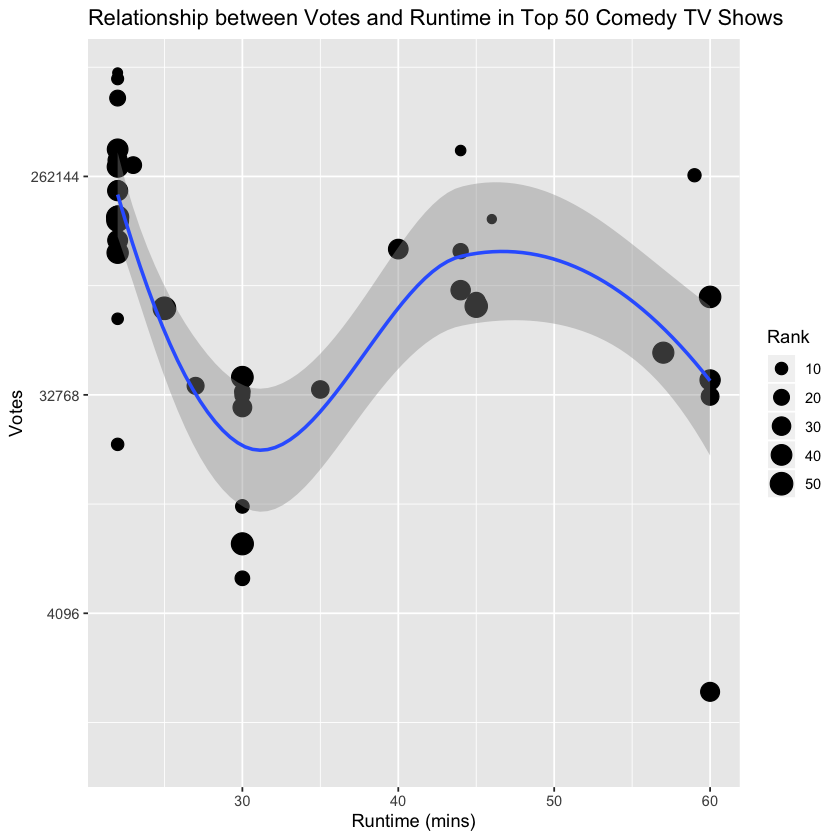

In [138]:
# Relationship between Votes and Runtime
# Most of the comedy TV shows which have larger votes are less than 40 mins.

ggplot(df_tv_shows_summary,aes(x = Runtime_mins,y = Votes))+
geom_point(aes(size = Rank)) + xlab('Runtime (mins)') + ggtitle("Relationship between Votes and Runtime in Top 50 Comedy TV Shows") + 
scale_y_continuous(trans = log2_trans()) + geom_smooth(method = "loess")

##### Most of the comedy TV shows which have larger votes are less than 40 mins. Moreover, people are willing to watch the TV shows which runtime is less than 25 mins. The TV shows which runtime is 30 mins has less votes than others.

### APIs 

#### After scraping the Top 50 Comedy TV Shows data above, we are going to use the API to get the daily pageview count data of 'Friends' (a famous comedy TV shows) in en.Wikipedia from September 24th 2018 to September 24th 2019. 
##### ('Friends' is an American television sitcom, created by David Crane and Marta Kauffman, which aired on NBC from September 22, 1994, to May 6, 2004, lasting ten seasons)

In [139]:
# set the data time in New Zealand timezone

Sys.setenv(TZ = "Pacific/Auckland")

In [140]:
library(tidyverse)

In [141]:
# get the API url

API_url <- paste("https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents",
             "Friends",
             "daily",
             "20180924",
             "20190924",
             sep = "/")

API_url 

[1] "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Friends/daily/20180924/20190924"

##### Now, We created the API url, which can be used to collect the data.

In [142]:
# 'httr' can complete communication with the remote server

library(httr)

In [143]:
# Calling the API and check the result

response <- GET(API_url , user_agent="friends_fans")

response

Response [https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Friends/daily/20180924/20190924]
  Date: 2019-09-30 04:20
  Status: 200
  Content-Type: application/json; charset=utf-8
  Size: 55.3 kB


##### Status: 200 means everything goes well.

In [144]:
# print the JSON format in a clear format

library(jsonlite)

In [145]:
# Print back the contents of the JSON text

toJSON(fromJSON(content(response, as = "text")), pretty = TRUE)

{
  "items": [
    {
      "project": "en.wikipedia",
      "article": "Friends",
      "granularity": "daily",
      "timestamp": "2018092400",
      "access": "all-access",
      "agent": "all-agents",
      "views": 12406
    },
    {
      "project": "en.wikipedia",
      "article": "Friends",
      "granularity": "daily",
      "timestamp": "2018092500",
      "access": "all-access",
      "agent": "all-agents",
      "views": 11793
    },
    {
      "project": "en.wikipedia",
      "article": "Friends",
      "granularity": "daily",
      "timestamp": "2018092600",
      "access": "all-access",
      "agent": "all-agents",
      "views": 11343
    },
    {
      "project": "en.wikipedia",
      "article": "Friends",
      "granularity": "daily",
      "timestamp": "2018092700",
      "access": "all-access",
      "agent": "all-agents",
      "views": 11166
    },
    {
      "project": "en.wikipedia",
      "article": "Friends",
      "granularity": "daily",
      "timestamp": "

##### It can be seen that the statistics of the number of visits for 1 year, as well as other metadata contained, are correctly fed back to us from the server API.

In [146]:
# Store this JSON content

friends_pageviews <- fromJSON(content(response, as="text"))

friends_pageviews

project,article,granularity,timestamp,access,agent,views
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
en.wikipedia,Friends,daily,2018092400,all-access,all-agents,12406
en.wikipedia,Friends,daily,2018092500,all-access,all-agents,11793
en.wikipedia,Friends,daily,2018092600,all-access,all-agents,11343
en.wikipedia,Friends,daily,2018092700,all-access,all-agents,11166
en.wikipedia,Friends,daily,2018092800,all-access,all-agents,10751
en.wikipedia,Friends,daily,2018092900,all-access,all-agents,11323
en.wikipedia,Friends,daily,2018093000,all-access,all-agents,14128
en.wikipedia,Friends,daily,2018100100,all-access,all-agents,69727
en.wikipedia,Friends,daily,2018100200,all-access,all-agents,17992


In [147]:
# Check the type of storage

typeof(friends_pageviews)

[1] "list"

##### The type of storage is a list.

In [148]:
# Extract the information and form a data frame

library(rlist)

##### For subsequent analysis, the information needed in it is extracted to form a data frame. So we use the R package ‘rlist’.

In [149]:
# extract the data and create a dataframe

friends_pageviews_df <- list.stack(list.select(friends_pageviews, timestamp, views))

friends_pageviews_df %>%
    head()

timestamp,views
<chr>,<int>
2018092400,12406
2018092500,11793
2018092600,11343
2018092700,11166
2018092800,10751
2018092900,11323


##### The data extraction is correct, including the date and number of views. However, this date format is not a standard format, and there will be problems in the analysis later. We need to do the conversion.

In [150]:
# Processing time and date format

library(lubridate)

In [151]:
# Erase the last two digits of the date string

library(stringr)

In [152]:
# Erasing the last two digits of the date string and then converting the original string to the standard date format.

friends_pageviews_df$timestamp <- ymd(str_sub(friends_pageviews_df$timestamp, 1, -3))

friends_pageviews_df %>%
    head()

timestamp,views
<date>,<int>
2018-09-24,12406
2018-09-25,11793
2018-09-26,11343
2018-09-27,11166
2018-09-28,10751
2018-09-29,11323


##### Now we got the dataframe.

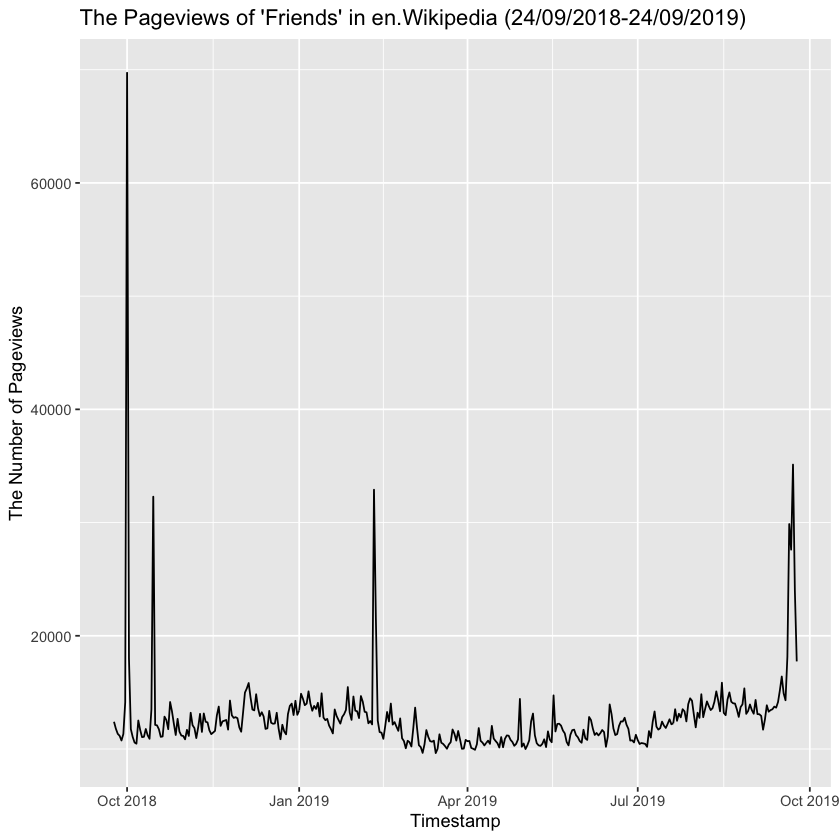

In [154]:
# Visualize the pageview of 'Friends' in en.wikipedia from September 24th 2018 to September 24th 2019

ggplot(friends_pageviews_df, aes(timestamp, views)) + geom_line() + xlab('Timestamp') + ylab('The Number of Pageviews') + ggtitle("The Pageviews of 'Friends' in en.Wikipedia (24/09/2018-24/09/2019)")

##### The en.wikipedia pageviews of 'Friends' is mostly below 20,000, but the number is still very optimistic, because 'Friends' is a 25-year-old TV series and ended in 2004. However, it is still quite good to maintain such pageviews so far, proving that 'Friends' is still have a certain popularity and a group of loyal fans. What's more noticeable is that the pageviews volume of 'Friends' will reach its peak every October, and this pageviews volume is quite high. In October 2018, the pageviews is about 70,000. I guess this is because the birthday of 'Friends' is on 22nd September.